<a href="https://colab.research.google.com/github/rtlab1417/my-arduino/blob/master/i2cADXL345.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying I2C connectivity
Example using ADXL345 accelerometer breakout - GY291

The trials are: 
1. i2c scanner - able to scan the addess of a unit of GY291 (see the issue)
2. i2c scanner for 2-units of GY291 and the simple wiring (no multiplexer)
3. Read the accelerometer raw outputs (x, y, z)

## References
[howtomechatronics](https://howtomechatronics.com/tutorials/arduino/how-to-track-orientation-with-arduino-and-adxl345-accelerometer/)

[Youtube - How I2C Communication Works and How To Use It with Arduino](https://www.youtube.com/watch?v=6IAkYpmA1DQ)

## Materials



*   Arduino UNO
*   GY291 x 2
* Some jumper wires and a bread board



## Wiring 
Two ADXL345 are wired.

Arduino UNO - ADXL345

A4 - SDA

A5 - SCL

5V - VCC

GND - GND

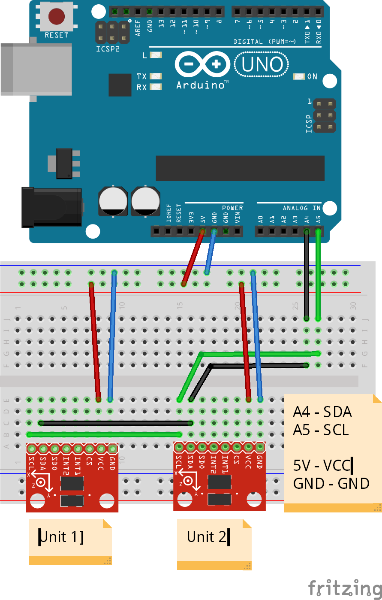

# Trial 1 - I2C scanner on connected I2C devices

Source: (https://playground.arduino.cc/Main/I2cScanner/)

[the author of i2c scanner] https://www.gammon.com.au/forum/?id=10896

## the code - I2C scanner
Do compile the sketch and download to Arduino Uno (wired)

Something interesting observed. GY291 x 2 are wired. Internally they are addressed coded as 0x53. Same!

The i2c scanner would scanner only **0x53**.



In [ ]:
// --------------------------------------
// i2c_scanner
//
// Version 1
//    This program (or code that looks like it)
//    can be found in many places.
//    For example on the Arduino.cc forum.
//    The original author is not know.
// Version 2, Juni 2012, Using Arduino 1.0.1
//     Adapted to be as simple as possible by Arduino.cc user Krodal
// Version 3, Feb 26  2013
//    V3 by louarnold
// Version 4, March 3, 2013, Using Arduino 1.0.3
//    by Arduino.cc user Krodal.
//    Changes by louarnold removed.
//    Scanning addresses changed from 0...127 to 1...119,
//    according to the i2c scanner by Nick Gammon
//    https://www.gammon.com.au/forum/?id=10896
// Version 5, March 28, 2013
//    As version 4, but address scans now to 127.
//    A sensor seems to use address 120.
// Version 6, November 27, 2015.
//    Added waiting for the Leonardo serial communication.
//
//
// This sketch tests the standard 7-bit addresses
// Devices with higher bit address might not be seen properly.
//
 
#include <Wire.h>
 
 
void setup()
{
  Wire.begin();
 
  Serial.begin(9600);
  while (!Serial);             // Leonardo: wait for serial monitor
  Serial.println("\nI2C Scanner");
}
 
 
void loop()
{
  byte error, address;
  int nDevices;
 
  Serial.println("Scanning...");
 
  nDevices = 0;
  for(address = 1; address < 127; address++ )
  {
    // The i2c_scanner uses the return value of
    // the Write.endTransmisstion to see if
    // a device did acknowledge to the address.
    Wire.beginTransmission(address);
    error = Wire.endTransmission();
 
    if (error == 0)
    {
      Serial.print("I2C device found at address 0x");
      if (address<16)
        Serial.print("0");
      Serial.print(address,HEX);
      Serial.println("  !");
 
      nDevices++;
    }
    else if (error==4)
    {
      Serial.print("Unknown error at address 0x");
      if (address<16)
        Serial.print("0");
      Serial.println(address,HEX);
    }    
  }
  if (nDevices == 0)
    Serial.println("No I2C devices found\n");
  else
    Serial.println("done\n");
 
  delay(5000);           // wait 5 seconds for next scan
}

The scanned result (from serial monitor)


In [ ]:
Scanning...
I2C device found at address 0x53  !
done

### the issues
1. Observation - Both GY291 are connected the same. Unable to scanner the address of two identical devices.

**The answer:**
Search internet and ADXL datasheet. 

GY291 (ADXL345) is addressed at 0x53.

To use more than an identical device, use a multiplexer to solve i2c address collisions.

[Adafruit TCA9548A 1-to-8 I2C Multiplexer Breakout](https://learn.adafruit.com/adafruit-tca9548a-1-to-8-i2c-multiplexer-breakout)



---



Alternatively, if only two ADXL345 are used. A simple solution is to shorted SD0 of second ADXL345 to Vcc. Force the address to change.

[See ADXL345 specification ] (https://www.analog.com/media/en/technical-documentation/data-sheets/ADXL345.pdf)

# Trial 2 - I2C scanner on connected two identical ADXL345

The issue was they are of same address 0x53.
Refering to datasheet. Trying to short unit 2 of ADXL345 - SD0 , to VCC, could change the address.

See the picture below.
Unit 2 - SD0 is shorted to VCC. 
Run i2c scanner and serial monitor.

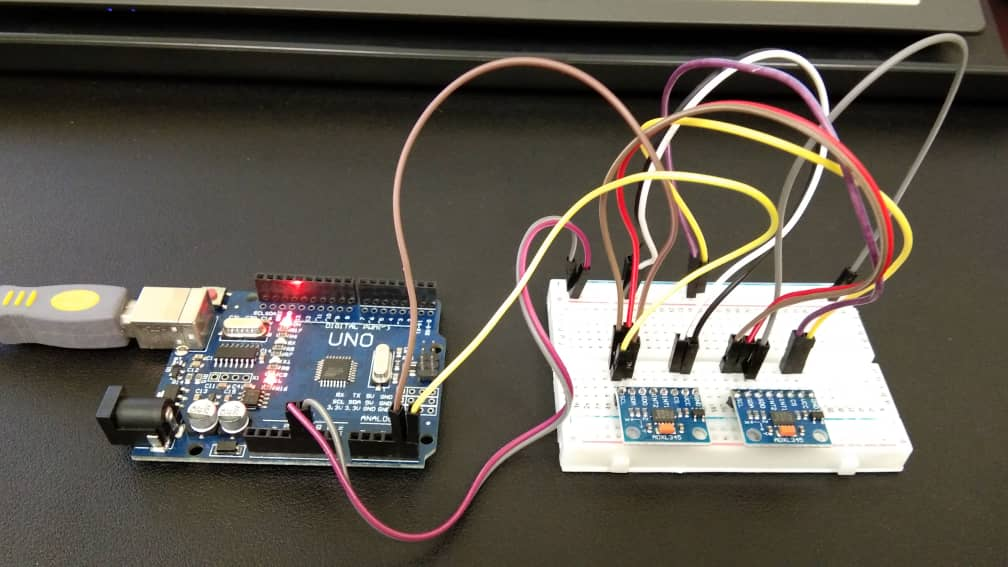

In [ ]:
Scanning...
I2C device found at address 0x1D  !
I2C device found at address 0x53  !
done

# Trial 3 - Read ADXL345 on different address
Source: https://howtomechatronics.com/tutorials/arduino/how-i2c-communication-works-and-how-to-use-it-with-arduino/


In [ ]:
/*
    Arduino and ADXL345 Accelerometer Tutorial
     by Dejan, https://howtomechatronics.com
*/

#include <Wire.h>  // Wire library - used for I2C communication

int ADXL345 = 0x53; // The ADXL345 sensor I2C address

/*
 if 2 units of ADXL345 are connected, the same address are read. 0x53. ==> no readings
 So, to change the address of another ADXL, short SD0 to VCC, get addres 0x1D
 0x53; // The ADXL345 sensor I2C address
 0x1D;
 */

float X_out, Y_out, Z_out;  // Outputs

void setup() {
  Serial.begin(9600); // Initiate serial communication for printing the results on the Serial monitor
  Wire.begin(); // Initiate the Wire library
  // Set ADXL345 in measuring mode
  Wire.beginTransmission(ADXL345); // Start communicating with the device 
  Wire.write(0x2D); // Access/ talk to POWER_CTL Register - 0x2D
  // Enable measurement
  Wire.write(8); // (8dec -> 0000 1000 binary) Bit D3 High for measuring enable 
  Wire.endTransmission();
  delay(10);
}

void loop() {
  // === Read acceleromter data === //
  Wire.beginTransmission(ADXL345);
  Wire.write(0x32); // Start with register 0x32 (ACCEL_XOUT_H)
  Wire.endTransmission(false);
  Wire.requestFrom(ADXL345, 6, true); // Read 6 registers total, each axis value is stored in 2 registers
  X_out = ( Wire.read()| Wire.read() << 8); // X-axis value
  X_out = X_out/256; //For a range of +-2g, we need to divide the raw values by 256, according to the datasheet
  Y_out = ( Wire.read()| Wire.read() << 8); // Y-axis value
  Y_out = Y_out/256;
  Z_out = ( Wire.read()| Wire.read() << 8); // Z-axis value
  Z_out = Z_out/256;

  Serial.print("Xa= ");
  Serial.print(X_out);
  Serial.print("   Ya= ");
  Serial.print(Y_out);
  Serial.print("   Za= ");
  Serial.println(Z_out);
  delay(1000);
}

# my resource

Github
